# Diabities Prediction Using the PIMA Dataset


In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import pickle

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#reading the dataset
data = pd.read_csv("diabetes.csv")

In [4]:
part_of_data = data.head().drop(["Outcome"],axis=1)
part_of_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
type(part_of_data)

pandas.core.frame.DataFrame

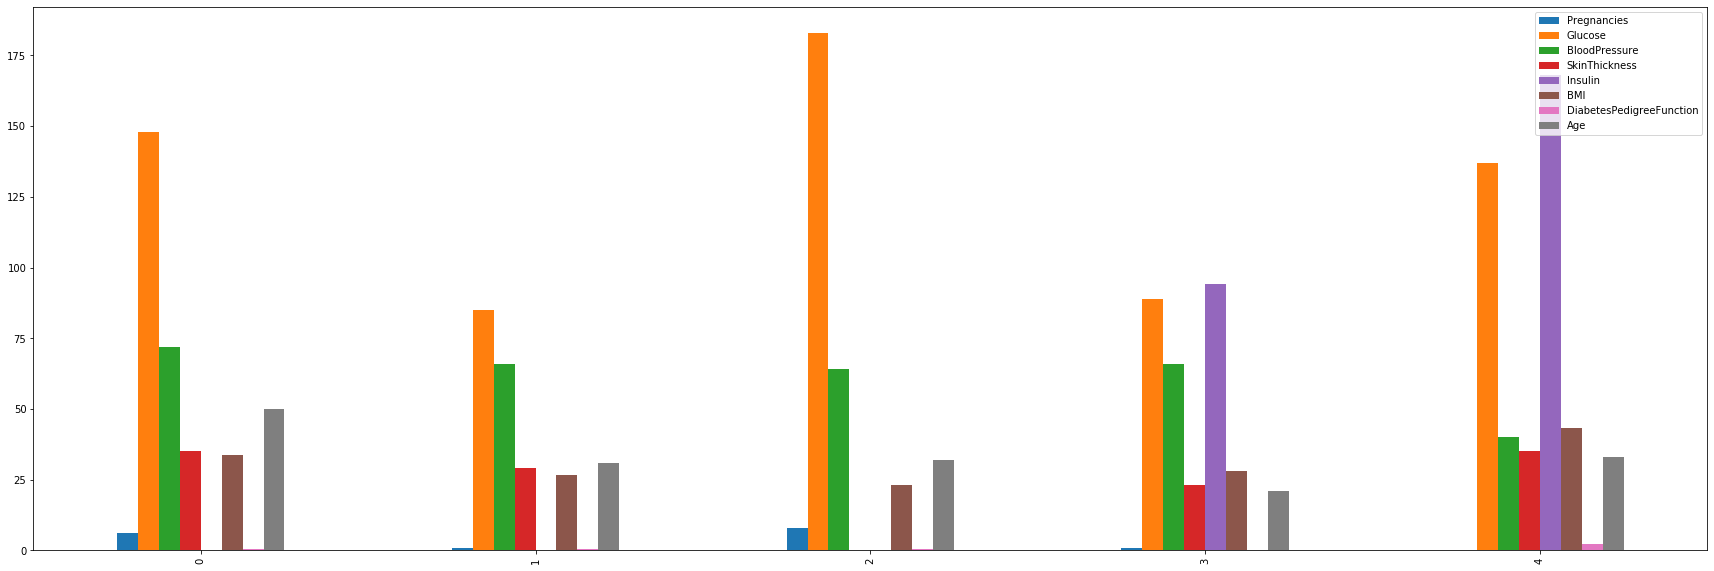

In [6]:
part_of_data.plot(kind='bar',figsize=(30,10));

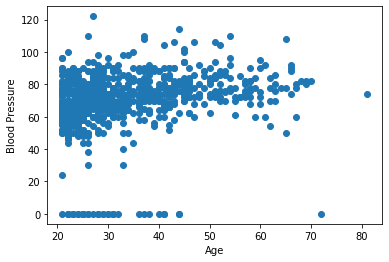

In [7]:
plt.scatter(data["Age"],data["BloodPressure"]);
plt.xlabel("Age");
plt.ylabel("Blood Pressure");

In [8]:
analysis = data[(data["Outcome"]==1)]["Age"]<20
np.array(analysis)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
data = np.array(data)

In [10]:
data[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

In [11]:
# for x
X = data[0:, [1,2,4,5,6,7]]
X = X.astype("int")
X[:5]

array([[148,  72,   0,  33,   0,  50],
       [ 85,  66,   0,  26,   0,  31],
       [183,  64,   0,  23,   0,  32],
       [ 89,  66,  94,  28,   0,  21],
       [137,  40, 168,  43,   2,  33]])

In [12]:
# for y
y =data[0:,-1]
y = y.astype("int")
y[:5]

array([1, 0, 1, 0, 1])

In [13]:
## Spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg.score(X_test,y_test)

0.7792207792207793

In [15]:
## Build an model (Decision Tree Classifier)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train);
## Evaluating the model
dtc.score(X_test,y_test)

0.6688311688311688

In [16]:
## Build an model (Naive bayes classifier)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train);
## Evaluating the model
gnb.score(X_test,y_test)

0.7142857142857143

In [17]:
## Build an model (Random forest classifier)
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train,y_train);
## Evaluating the model
reg.score(X_test,y_test)

0.6948051948051948

In [ ]:
glucose=input("Enter the glucose amount on your body")
bp=input("enter the Blood pressure")
insulin=input("Enter your insulin level")
bmi=input("enter your Body Mass Index")
dfx=input("Enter your DiabetesPedigreeFunction")
age=input("Enter your age")

In [ ]:
user_data = pd.DataFrame({"Glucose":glucose,"BloodPressure":bp,"Insulin":insulin,"BMI":bmi,"DiabetesPedigreeFunction":dfx,"Age":age},index=["data"])
user_data

In [ ]:
reg.predict_proba(X_test)
inputt = [x for x in f"{glucose} {bp} {insulin} {bmi} {dfx} {age}".split(' ')]
final = [np.array(inputt)]
pred=reg.predict_proba(final)
prediction = pred[0][1]

In [ ]:
print(f"Probability of you having diabities is {prediction}")